# 서포트 벡터 머신(SVM)과 커널 트릭(Kernel Trick)

### 개념 요약
**서포트 벡터 머신(Support Vector Machine, SVM)**은 분류(Classification)를 위한 강력한 머신러닝 모델임. SVM은 각 데이터 포인트를 N차원 공간의 점으로 표현하고, 두 클래스(Class)를 가장 잘 구분하는 최적의 초평면(Hyperplane)을 찾는 것을 목표로 함. 이때, 두 클래스와 가장 가까운 데이터 포인트(Support Vector)와의 거리, 즉 마진(Margin)을 최대로 만드는 초평면을 찾음.

**커널 트릭(Kernel Trick)**은 선형적으로 분리할 수 없는 데이터를 고차원 공간으로 매핑하여 선형 분리가 가능하도록 만드는 기법임. 실제로 데이터를 고차원으로 변환하지 않고도, 고차원에서 내적(Inner product)을 계산한 것과 같은 결과를 얻을 수 있어 계산 효율성이 매우 뛰어남.

### 수학적 배경 📐
SVM은 마진을 최대로 만드는 초평면 $w^T x - b = 0$을 찾고자 함. 마진의 크기는 $\frac{2}{\|w\|}$로 표현되며, 이를 최대화하는 것은 $\|w\|$를 최소화하는 것과 같음.

커널 트릭은 원래의 특성 공간에서 비선형인 결정 경계를 고차원 특성 공간에서 선형으로 찾을 수 있게 함. 두 벡터 $x_i, x_j$를 고차원으로 매핑하는 함수를 $\phi$라고 할 때, 커널 함수 $K$는 다음과 같이 정의됨. 이 트릭 덕분에 고차원 공간의 좌표 $\phi(x)$를 직접 계산할 필요가 없어짐.
$$ K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j) $$

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

### 예제 데이터 준비 (Data Preparation)
선형적으로 분리가 불가능한, 동심원 형태의 데이터를 생성하여 커널 트릭의 필요성을 명확히 보여줌.

데이터 X의 형태: (100, 2)
타겟 y의 형태: (100,)


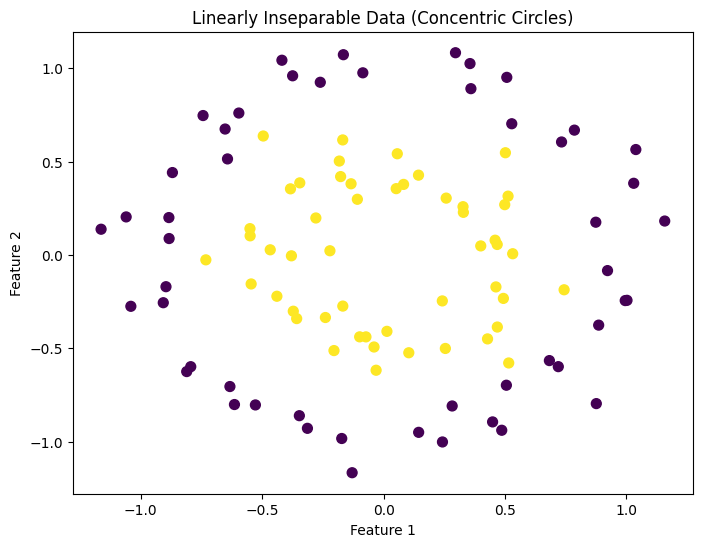

In [2]:
# 비선형 데이터 생성
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# 데이터 형태 확인
print(f"데이터 X의 형태: {X.shape}")
print(f"타겟 y의 형태: {y.shape}")

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Linearly Inseparable Data (Concentric Circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 핵심 로직 구현 (Code Implementation)
먼저 선형(Linear) 커널을 사용하는 SVM이 이 데이터를 제대로 분류하지 못하는 것을 확인하고, 그 다음 RBF(Radial Basis Function) 커널을 사용해 비선형 경계를 성공적으로 찾아내는 것을 비교함.

In [3]:
# 1. 선형 커널 SVM 모델 생성 및 학습
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X, y)

# 2. RBF 커널 SVM 모델 생성 및 학습
# RBF 커널은 가우시안 커널이라고도 불리며, 비선형 분류에 널리 사용됨.
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X, y)

print("선형 커널 SVM과 RBF 커널 SVM 모델 학습 완료.")

선형 커널 SVM과 RBF 커널 SVM 모델 학습 완료.


### 결과 확인 및 시각화 📊
두 모델의 결정 경계를 시각화하여 커널 트릭의 효과를 직관적으로 비교함. 선형 커널은 직선 경계만 만들 수 있어 데이터를 나눌 수 없지만, RBF 커널은 복잡한 비선형 경계를 만들어 데이터를 완벽하게 분류함.

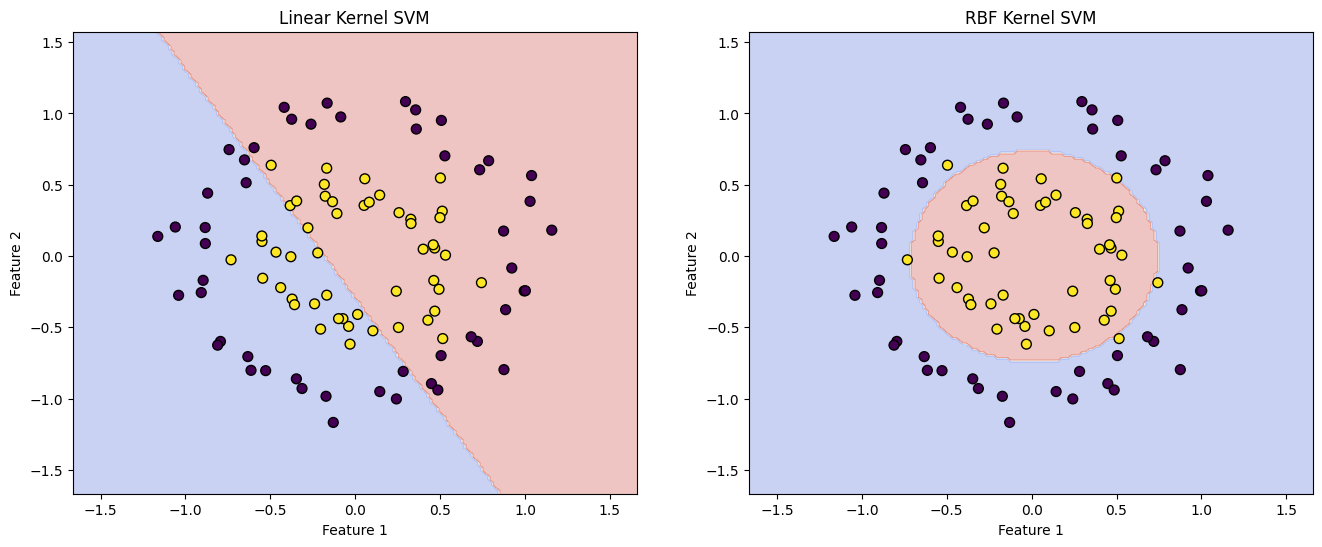

In [4]:
# 시각화를 위한 그리드 생성 함수
def plot_decision_boundary(model, ax, title):
    # 그리드 범위 설정
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # 모델을 이용해 그리드 각 점의 클래스 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 결정 경계와 데이터 포인트 시각화
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# 두 모델의 결정 경계 비교
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_decision_boundary(linear_svm, ax1, 'Linear Kernel SVM')
plot_decision_boundary(rbf_svm, ax2, 'RBF Kernel SVM')

plt.show()

### 고려사항 (Considerations)
* **커널 선택:** 데이터의 분포에 따라 적절한 커널(linear, poly, rbf, sigmoid 등)을 선택하는 것이 중요함. RBF 커널이 일반적으로 좋은 성능을 보이지만, 항상 최적은 아님.
* **하이퍼파라미터 튜닝:** SVM의 성능은 하이퍼파라미터에 민감함.
    * `C` (Regularization parameter): 마진의 너비와 분류 오류 사이의 균형을 조절함. `C`가 크면 오류를 덜 허용하여 마진이 좁아지고 과적합(Overfitting) 경향이 생길 수 있음.
    * `gamma` (RBF 커널 파라미터): 하나의 데이터 포인트가 영향을 미치는 범위를 결정함. `gamma`가 크면 결정 경계가 더 복잡해져 과적합될 수 있음.

### 최종 요약 (Conclusion)
서포트 벡터 머신(SVM)은 마진을 최대화하는 방식으로 클래스를 구분하는 강력한 분류기임. 특히, 커널 트릭을 통해 원래 차원에서는 선형 분리가 불가능한 데이터도 고차원으로 매핑하여 효과적으로 분류할 수 있음.

이 예제에서는 선형 커널로는 분류할 수 없었던 동심원 데이터를 RBF 커널을 사용한 SVM이 완벽하게 분류하는 것을 확인하였음. 이를 통해 커널 트릭이 어떻게 SVM을 비선형 분류 문제에까지 확장시키는지를 직관적으로 이해할 수 있음.